In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
df = pd.read_csv("data/info_suppliers.csv")

In [3]:
df.columns

Index(['dimension', 'supplier'], dtype='object')

# Descriptive analysis

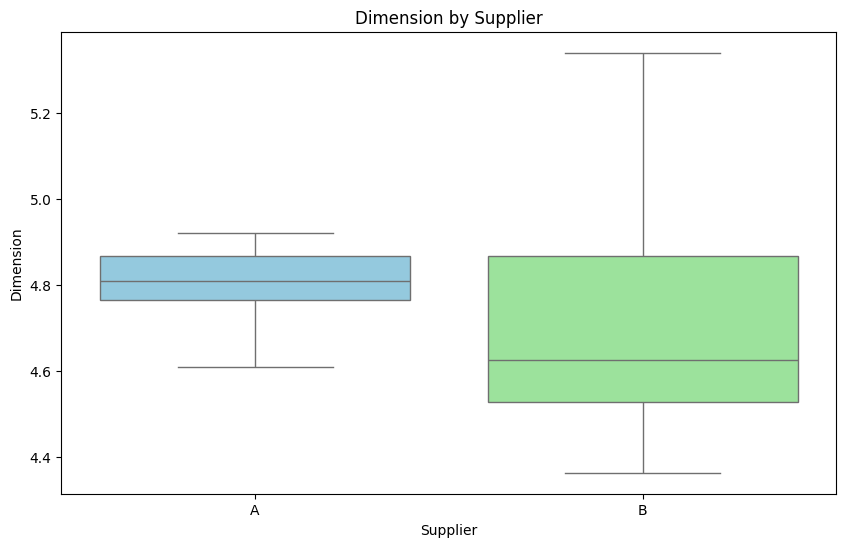

In [22]:
def plot_box_plot(df):
    colors = ['#87CEEB', '#90EE90']

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='supplier', y='dimension', data=df, palette=colors, hue='supplier', dodge=False, linewidth=1)
    plt.title('Dimension by Supplier')
    plt.xlabel('Supplier')
    plt.ylabel('Dimension')
    plt.show()

plot_box_plot(df)

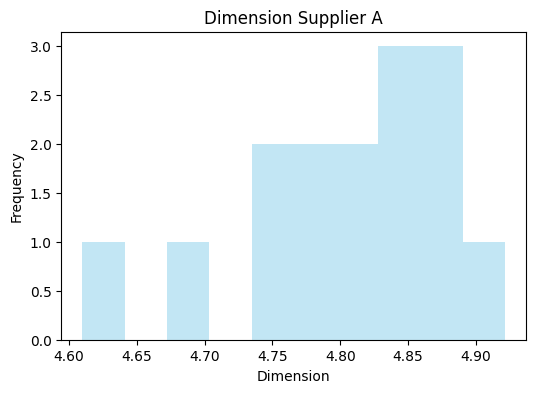

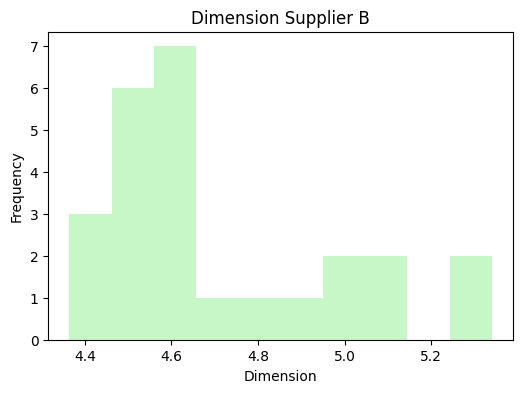

In [21]:
def plot_histograms(df):
    colors = ['#87CEEB', '#90EE90']

    for i, supplier in enumerate(df['supplier'].unique()):
        supplier_data_dimensao = df[df['supplier'] == supplier]['dimension']
        plt.figure(figsize=(6, 4))
        
        plt.hist(supplier_data_dimensao, bins=10, alpha=0.5, color=colors[i])
        
        plt.title(f'Dimension Supplier {supplier}')
        plt.xlabel('Dimension')
        plt.ylabel('Frequency')
        plt.show()
        
plot_histograms(df)

In [8]:
df.groupby('supplier')['dimension'].agg(['mean'])

,mean
supplier,
A,4.806509
B,4.717257


# Error estimation

In [10]:
def calculate_error(df):
    df['error'] = 0
    df.loc[(df['dimension'] > (4.8 + 0.3)) | (df['dimension'] < (4.8 - 0.3)), 'error'] = 1
    return

calculate_error(df)

df.groupby('supplier')['error'].agg(['mean']).rename({"mean":"percentage"}, axis =1)

,percentage
supplier,
A,0.00
B,0.36


# Hypothesis testing

Null Hypothesis (H0):
H0: There is no significant difference in the mean dimensions of parts between suppliers.

Alternative Hypothesis (H1):
H1: There is a significant difference in the mean dimensions of parts between suppliers.

In [13]:
result = smf.ols('dimension ~ supplier', data=df).fit()

print(result.summary().tables[1])

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.8065      0.058     82.605      0.000       4.689       4.924
supplier[T.B]    -0.0893      0.074     -1.213      0.233      -0.238       0.060


In [15]:
dimensions_A = df[df['supplier'] == 'A']['dimension']
dimensions_B = df[df['supplier'] == 'B']['dimension']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(dimensions_A, dimensions_B)
p_value

0.2327496461766266